In [6]:
import pandas as pd
hp = pd.read_csv('hpdemo.csv') #make sure in the same folder
print(hp)

print(hp['price']) #access columns
print(hp['price']/1000) #rescale

        ID    east   north   price  fl_area
0        1  523800  179700  107000       50
1        2  533200  170900   55500       66
2        3  514600  175800  103000       90
3        4  516000  171000  187000      125
4        5  533700  169200   43000       50
...    ...     ...     ...     ...      ...
1400  1401  515600  173100   68500       44
1401  1402  513200  186500   58500       59
1402  1403  542900  189500  247000      185
1403  1404  524900  185300  153000       96
1404  1405  522000  185400  146250      111

[1405 rows x 5 columns]
0       107000
1        55500
2       103000
3       187000
4        43000
         ...  
1400     68500
1401     58500
1402    247000
1403    153000
1404    146250
Name: price, Length: 1405, dtype: int64
0       107.00
1        55.50
2       103.00
3       187.00
4        43.00
         ...  
1400     68.50
1401     58.50
1402    247.00
1403    153.00
1404    146.25
Name: price, Length: 1405, dtype: float64


## Basic Statistical graphics

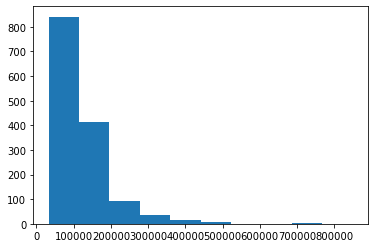

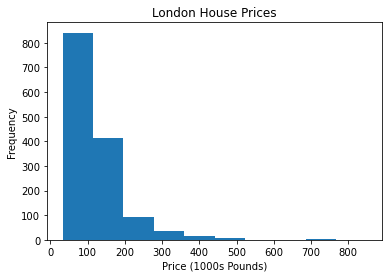

In [7]:
import matplotlib.pyplot as pl
import numpy as np
pl.hist(hp['price'])
pl.show()

#make it neater
pl.close()

pl.hist(hp['price']/1000)
pl.xlabel('Price (1000s Pounds)')
pl.ylabel('Frequency')
pl.title('London House Prices')
pl.show()


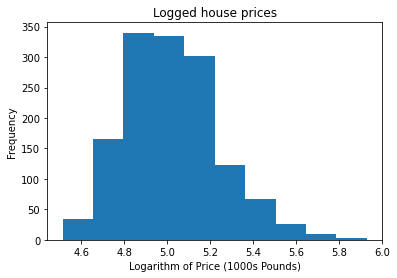

In [8]:
pl.close()

#can use numpy operations on data frames eg log of house prices

pl.hist(np.log10(hp['price']))
pl.xlabel('Logarithm of Price (1000s Pounds)')
pl.ylabel('Frequency')
pl.title('Logged house prices')
pl.show()

so above the log to the base 10 was used so house prices are more standardized, 10,000=4 100,000=5 and so on

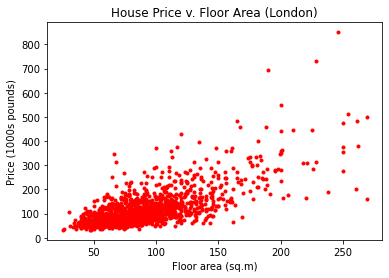

In [9]:
#scatter plot
pl.close()
pl.scatter(hp['fl_area'],hp['price']/1000,color='r',marker='.')
pl.xlabel('Floor area (sq.m)')
pl.ylabel('Price (1000s pounds)')
pl.title('House Price v. Floor Area (London)')
pl.show()

interestingly there is not a total corellation between these attributes

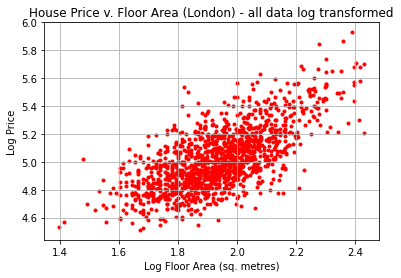

In [11]:
#suppose we take the logs of both the price and the floor area and plot

pl.close()
pl.scatter(np.log10(hp['fl_area']),np.log10(hp['price']),color='r',marker='.')
pl.xlabel('Log Floor Area (sq. metres)')
pl.ylabel('Log Price')
pl.title('House Price v. Floor Area (London) - all data log transformed')
pl.grid(True)
pl.show()

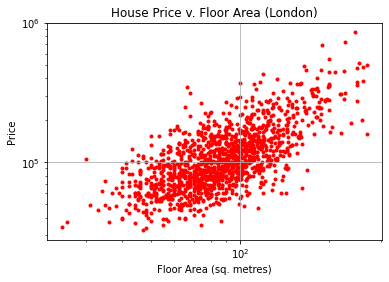

In [12]:
#another way to visualise is to leave the data untransformed but to use 
# log-scale axes.. use the loglog function

pl.close()
pl.scatter(hp['fl_area'],hp['price'],color='r',marker='.')
pl.xlabel('Floor Area (sq. metres)')
pl.ylabel('Price')
pl.title('House Price v. Floor Area (London)')
pl.grid()
pl.loglog()
pl.show()

# Some statistical analysis

In [13]:
import scipy.stats as st
print(st.linregress(np.log10(hp['fl_area']),np.log10(hp['price'])))
#The five numbers returned by this function as a 5-tuple are as follows:

#The slope of the regression line
#The intercept of the regression line
#The correlation of the regression line
#The p-value of a significance test for the null hypothesis that the slope is zero
#The standard deviation of the residuals

LinregressResult(slope=0.9270036975002853, intercept=3.224878788152767, rvalue=0.6826937715703115, pvalue=2.1064878868955634e-193, stderr=0.02648918108857678)


The five numbers returned by this function as a 5-tuple are as follows:

1. The slope of the regression line
2. The intercept of the regression line
3. The correlation of the regression line
4. The p-value of a significance test for the null hypothesis that the slope is zero
5. The standard deviation of the residuals

In [14]:
#here we assign these 5 variables

a,b,r,pval,sderr = st.linregress(np.log10(hp['fl_area']),
                                 np.log10(hp['price']))
#print out neatly
print("a = %6.3f (slope)" % a) # y = b0 + b1(X).. y = intercept + slope.X
print("b = %6.3f (Intercept)" % b)
print("r = %6.3f (correlation)" % r)


a =  0.927 (slope)
b =  3.225 (Intercept)
r =  0.683 (correlation)


can also add a fitted line to the scatter plot, use plot command in pylab. 

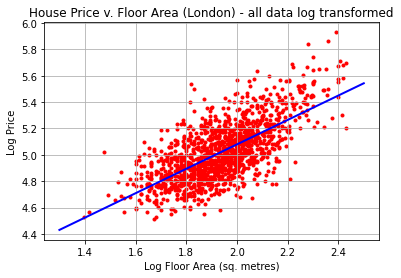

In [15]:
pl.close()
pl.scatter(np.log10(hp['fl_area']),np.log10(hp['price']),
    color='r',marker='.')
pl.xlabel('Log Floor Area (sq. metres)')
pl.ylabel('Log Price')
pl.title('House Price v. Floor Area (London) - all data log transformed')
pl.grid(True)
x_reg = np.linspace(1.3,2.5,100)
y_reg = b + a * x_reg
pl.plot(x_reg,y_reg,color='b',lw=2.0)
pl.show()

it may be useful to plot the untransformed variables, the following code applies the inverse of the log10(x) transform(10^x) to the points on the fitted line

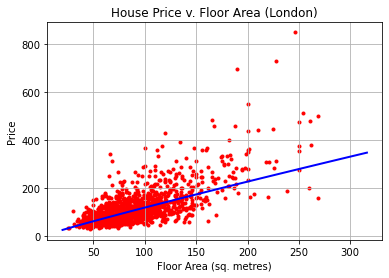

In [16]:
pl.close()
pl.scatter(hp['fl_area'],hp['price']/1000,color='r',marker='.')
pl.xlabel('Floor Area (sq. metres)')
pl.ylabel('Price')
pl.title('House Price v. Floor Area (London)')
pl.grid(True)
pl.plot(10.0**x_reg,10.0**y_reg/1000,color='b',lw=2.0)
pl.show()

KERNEL DENSITY ESTIMATE

Input to KDE needs to be in 2 x n matrix where n = no. of dsta points. Note that this is the opposite to a dataframe, as variables correspond to rows not columns.
In a single expression it is possible to extract the price and floor area columns, transpose them, take logs of them and assign the result to a new variable called log_data.

In [17]:
log_data = np.log10(hp[['fl_area','price']].T)

next this data is fed into the gaussian_kde function, this is an unusual function as it returns a function which is used to compute the density estimste at new data points

In [18]:
f_hat = st.gaussian_kde(log_data)

#This creates a new function that takes a matrix of data points,
#and works out the value of kernel density estimate at those points. 
#A typical use of this is to evaluate f_hat over a regular grid of (x,y)
#points, which can then be used to draw contour images,
#or plot 3D surfaces. 

To do this, you need to create a 2D array of x-points and another of the corresponding y-points, and then step through each grid location and compute the density with f_hat. 

In [31]:
#The grid values for the x and y points can be created using the
#numpy function meshgrid - this takes a list of x-values, and another
#of y-values and creates a 2D array of all possible combinations.
#linspace can be used to generate evenly spaced sequences in the x
#and y directions.

x_grd, y_grd = np.meshgrid(np.linspace(1.3,2.5,100), 
                          np.linspace(4.0,6.5,100))

The next step is to create a third 2D array in which the corresponding density estimates should be stored. This can be done via the zeros_like function - it creates a 2D array that has the same number of rows and columns as its argument, but every element is zero. Essentially this just creates a 2D array of place holders. Once this is done, you can loop through the grid of x and y values, and compute the density estimates:

In [33]:
dens_grd = np.zeros_like(x_grd)
for i in range(len(x_grd)):
    for j in range(len(y_grd)):
        dens_grd[i,j] = f_hat([x_grd[i,j],y_grd[i,j]])

Now the array dens_grid contains the grid of kernel density estimates, it may be used to create contour images. Contour plots can be created by the pyplot function contour:

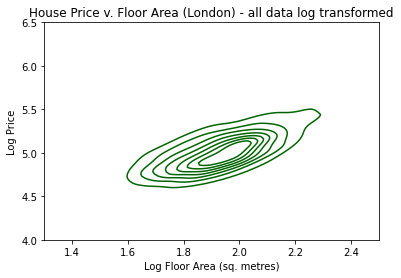

In [35]:
pl.close()
pl.contour(x_grd,y_grd,dens_grd,colors='DarkGreen')
pl.xlabel('Log Floor Area (sq. metres)')
pl.ylabel('Log Price')
pl.title('House Price v. Floor Area (London) - all data log transformed')
pl.show()

/Users/jackhickey/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fl_area', ylabel='price'>

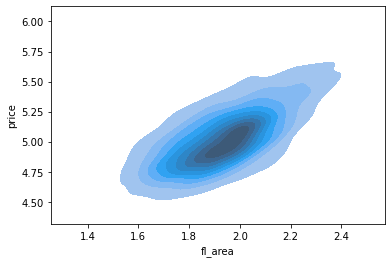

In [30]:
#alternatley you can use seaborn method

from matplotlib import pyplot as plt
import seaborn as sns

fl = np.log10(hp['fl_area'])
pr = np.log10(hp['price'])
sns.kdeplot(fl,pr, n_levels=10,shade=True)
